In [1]:
# Clustering (Unsupervised Machine Learning)
# Clustering is the task of dividing the population or data points into a number of groups such that data points in the
# same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign
# them to clusters

# Let's understand this with the example. Suppose, you are the head of a rental store and wish to understand preferences
# of your customers to sacle up your business. Is it possible foryou to look at details of each customer and devise a unique
# business strategy for each one of them? Definitely not. But, what you can do is to cluster all of your customers into say
# 10 groups based on their purchasing habits and use a separate strategy for customers in each of these 10 groups. And this
# is what we call clustering

In [2]:
# Importing the data
import pandas as pd
DataIris = pd.read_csv('C:/Users/Chinmaya/IVY Python ML-Oct 2022/IRIS.csv')
DataIris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Keeping the target variable for future reference
TargetVariable = DataIris['Species']

# Dropping the target variable to get only predictors
# We will apply PCA only on the predictors
OnlyPredictors = DataIris.drop('Species', axis=1)

OnlyPredictors.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Taking out the only predcitor variables
y=TargetVariable.values
X=OnlyPredictors.values

# Printing some sample records
print(X[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


C:\Users\Chinmaya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[681.3706, 152.34795176035792, 78.85144142614601, 57.228473214285714, 46.472230158730156, 39.03998724608725, 34.830916305916304, 29.990426406926403, 28.11658686342897, 26.586260980849218]


<function matplotlib.pyplot.show(close=None, block=None)>

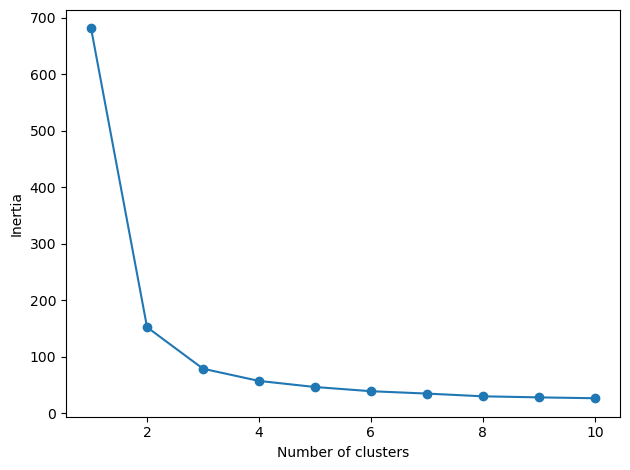

In [6]:
# Priting the best number of clusters based on the inertia value
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertiaValue = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
               init='random',
               n_init=10,
               max_iter=300,
               tol=1e-04,
               random_state=0)
    
    km.fit(X)
    inertiaValue.append(km.inertia_)
    
plt.plot(range(1, 11), inertiaValue, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
# plt.savefig('elbow.png', dpi=300)
print(inertiaValue)
plt.show

In [7]:
# Using above graph deciding optimal number of clusters
# Defining the K-Means object for best number of clusters. n=3 in this case
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=3)

In [8]:
# Running the clustering algorithm on the data set
predictedCluster =km.fit_predict(X)
print(predictedCluster)
print('Inertia:', km.inertia_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
Inertia: 78.85144142614601


In [10]:
DataIris['PredcitedClusterID']=predictedCluster
DataIris.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,PredcitedClusterID
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2
5,5.4,3.9,1.7,0.4,setosa,2
6,4.6,3.4,1.4,0.3,setosa,2
7,5.0,3.4,1.5,0.2,setosa,2
8,4.4,2.9,1.4,0.2,setosa,2
9,4.9,3.1,1.5,0.1,setosa,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


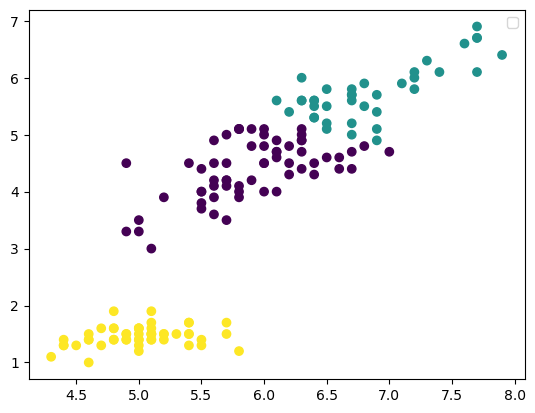

In [13]:
# Create scatter plot to visualize the data
# Choose those two continuous columns which has maximum range of values
%matplotlib inline
plt.scatter(x=DataIris['Sepal.Length'], y=DataIris['Petal.Length'], c=DataIris['PredcitedClusterID'])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


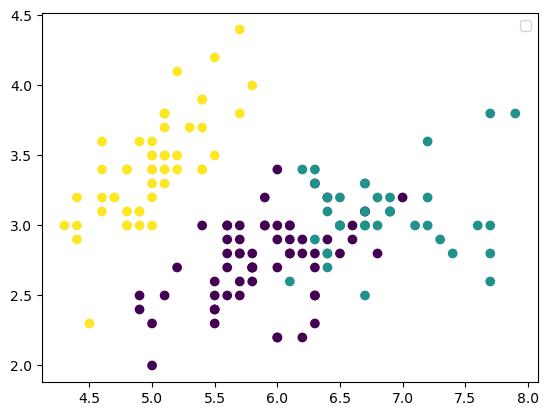

In [14]:
# Create scatter plot to visualize the data
%matplotlib inline
plt.scatter(x=DataIris['Sepal.Length'], y=DataIris['Sepal.Width'], c=DataIris['PredcitedClusterID'])
plt.legend()